In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def read_all_sheets_from_excel(Filepath):
    return pd.read_excel(Filepath, sheet_name=None)
Filepath = 'Desktop/Source File.xlsx'
dataframes = read_all_sheets_from_excel(Filepath)

for k, v in dataframes.items():
    print('Dataframe: ' + k)
    print(v.head(15))


Dataframe: UserDetails.csv
  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   
5    U006    Frank Green   25         Austin        2023-06-15  888-777-6666   
6    U007     Grace King   38         Boston        2023-07-02  999-888-7777   
7    U008      Henry Lee   31          Miami        2023-08-11  101-202-3030   
8    U009    Irene Moore   33         Dallas        2023-09-01  202-303-4040   
9    U010     Jack White   29        Phoenix        2023-10-10  303-404-5050   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner       

In [36]:
# Cleaning and preparing the data for analysis
# Converting date columns to datetime format for easier analysis
for sheet_name, df in dataframes.items():
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    if 'Session Start' in df.columns:
        df['Session Start'] = pd.to_datetime(df['Session Start'], errors='coerce')
    if 'Session End' in df.columns:
        df['Session End'] = pd.to_datetime(df['Session End'], errors='coerce')
    if 'Order Date' in df.columns:
        df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

cooking_sessions = dataframes['CookingSessions.csv']
order_details = dataframes['OrderDetails.csv']
user_details = dataframes['UserDetails.csv']

merged_data = pd.merge(order_details, cooking_sessions, on='Session ID', how='inner')

print(merged_data.head())


   Order ID User ID_x Order Date Meal Type_x      Dish Name_x Order Status  \
0      1001      U001 2024-12-01      Dinner        Spaghetti    Completed   
1      1002      U002 2024-12-01       Lunch     Caesar Salad    Completed   
2      1003      U003 2024-12-02      Dinner  Grilled Chicken     Canceled   
3      1004      U001 2024-12-02   Breakfast         Pancakes    Completed   
4      1005      U004 2024-12-03       Lunch     Caesar Salad    Completed   

   Amount (USD) Time of Day  Rating Session ID User ID_y      Dish Name_y  \
0          15.0       Night     5.0       S001      U001        Spaghetti   
1          10.0         Day     4.0       S002      U002     Caesar Salad   
2          12.5       Night     NaN       S003      U003  Grilled Chicken   
3           8.0     Morning     4.0       S004      U001         Pancakes   
4           9.0         Day     4.0       S005      U004     Caesar Salad   

  Meal Type_y       Session Start         Session End  Duration (min

                 Total Orders  Average Rating
Dish Name_x                                  
Grilled Chicken             4        4.666667
Spaghetti                   4        4.500000
Caesar Salad                3        4.000000
Pancakes                    2        4.000000
Veggie Burger               2        4.000000


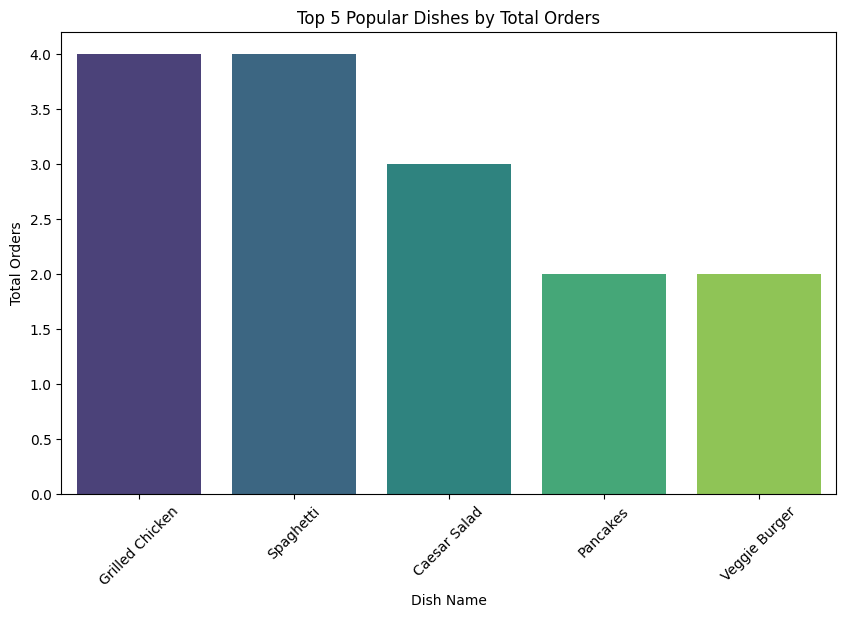

In [46]:
# Identifying popular dishes based on the number of orders and ratings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

popular_dishes = merged_data.groupby('Dish Name_x').agg({
    'Order ID': 'count',  # Count of orders
    'Rating': 'mean'     # Average rating
}).rename(columns={'Order ID': 'Total Orders', 'Rating': 'Average Rating'}).sort_values(by='Total Orders', ascending=False)

print(popular_dishes.head())


plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=popular_dishes.head(5).index,
    y=popular_dishes['Total Orders'].head(5),
    palette='viridis'
)
plt.title('Top 5 Popular Dishes by Total Orders')
plt.xlabel('Dish Name')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()


     Total Orders
Age              
25              1
27              2
28              3
30              2
31              1


Text(0, 0.5, 'Total Orders')

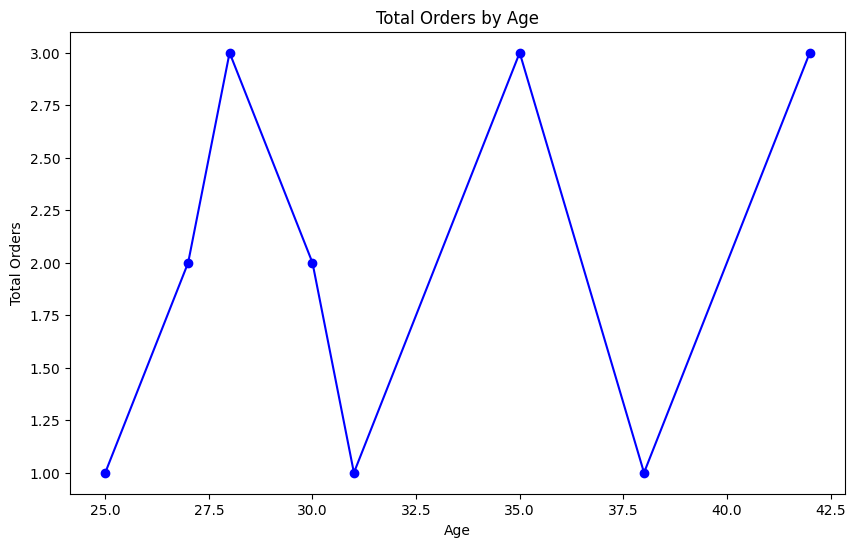

In [47]:
# Exploring demographic factors influencing user behavior
# Merging user details with the merged dataset to include demographic information
full_data = pd.merge(merged_data, user_details, left_on='User ID_x', right_on='User ID', how='inner')

age_orders = full_data.groupby('Age').agg({
    'Order ID': 'count'  # Total orders by age
}).rename(columns={'Order ID': 'Total Orders'}).sort_index()

print(age_orders.head())

plt.figure(figsize=(10, 6))
plt.plot(age_orders.index, age_orders['Total Orders'], marker='o', color='b')
plt.title('Total Orders by Age')
plt.xlabel('Age')
plt.ylabel('Total Orders')


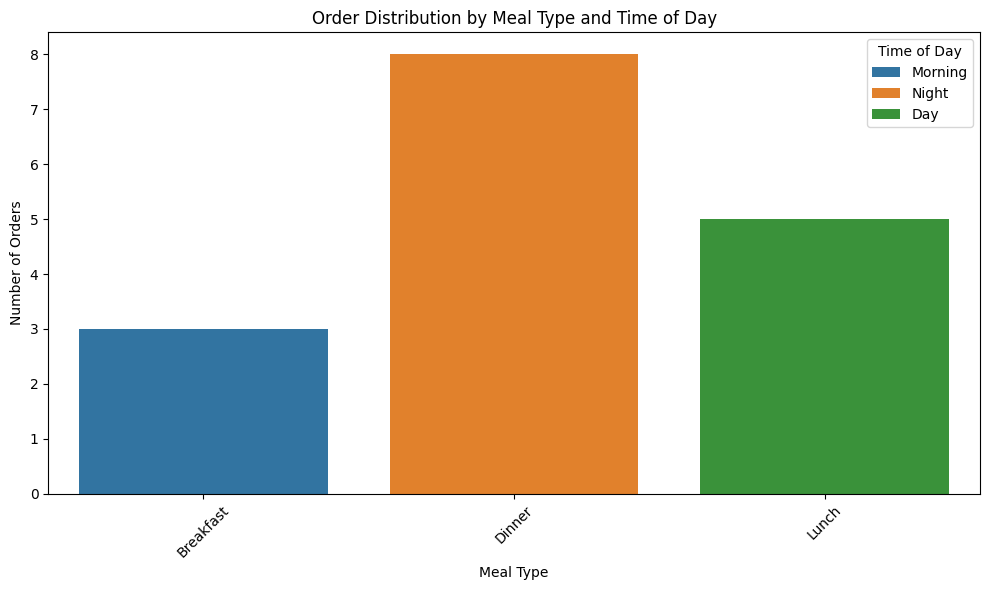


Average Cooking Duration by Meal Type:
Meal Type_x
Dinner       38.750000
Breakfast    23.333333
Lunch        21.000000
Name: Duration (mins), dtype: float64


In [48]:
# Analyzing meal type preferences and timing
meal_timing = merged_data.groupby(['Meal Type_x', 'Time of Day']).agg({
    'Order ID': 'count',
    'Amount (USD)': 'mean',
    'Rating': 'mean'
}).reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=meal_timing, x='Meal Type_x', y='Order ID', hue='Time of Day')
plt.title('Order Distribution by Meal Type and Time of Day')
plt.xlabel('Meal Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()


avg_duration = merged_data.groupby('Meal Type_x')['Duration (mins)'].mean().sort_values(ascending=False)
print("\nAverage Cooking Duration by Meal Type:")
print(avg_duration)


<Figure size 1200x600 with 0 Axes>

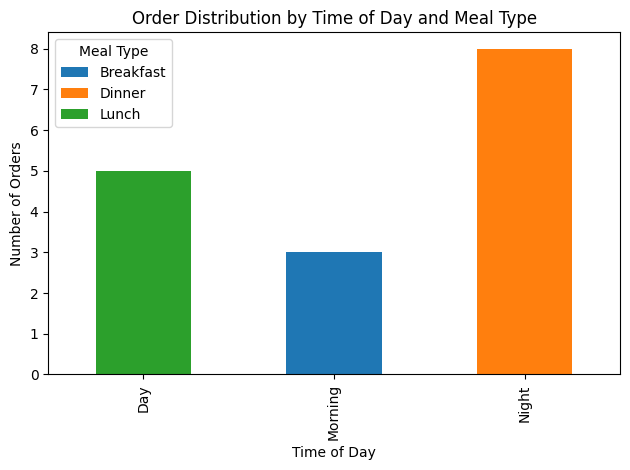

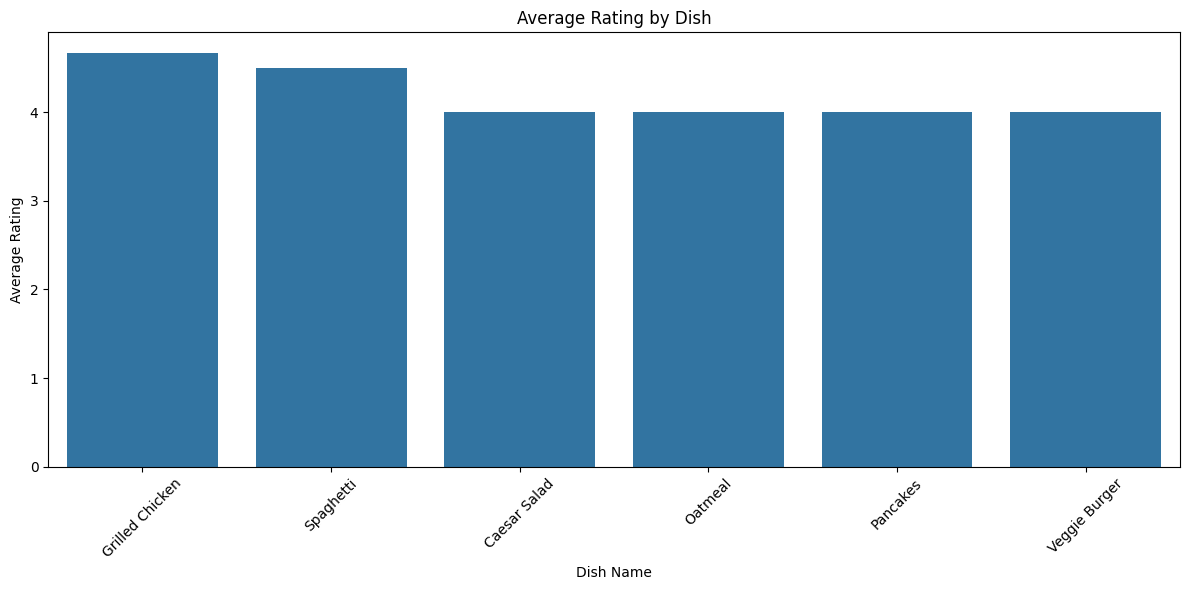

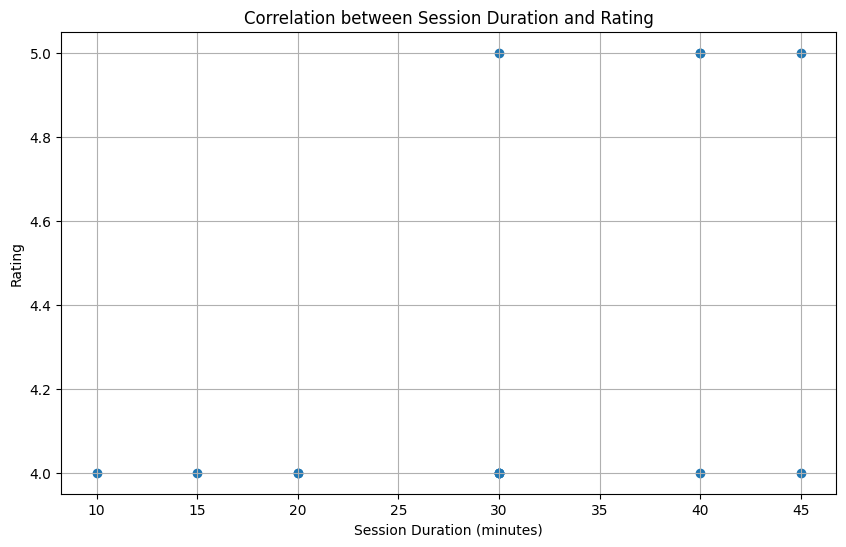

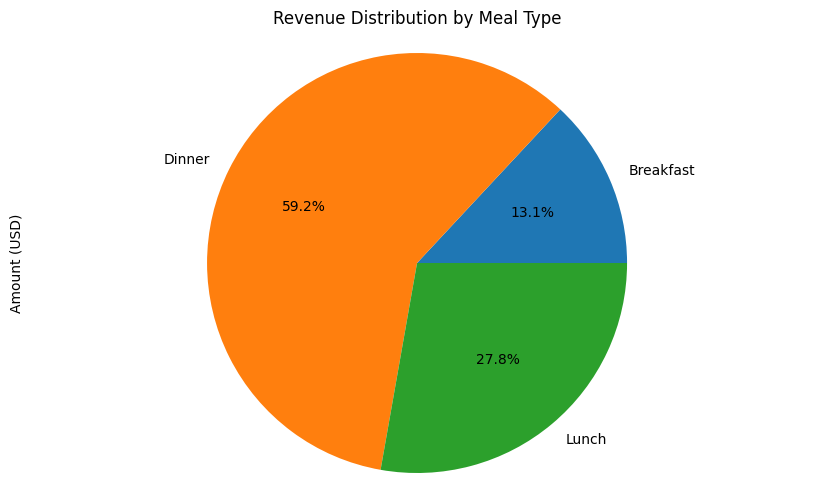


Key Metrics:

Average Order Amount by Meal Type:
Meal Type_x
Breakfast     7.833333
Dinner       13.312500
Lunch        10.000000
Name: Amount (USD), dtype: float64

Average Session Duration by Meal Type:
Meal Type_x
Breakfast    23.333333
Dinner       38.750000
Lunch        21.000000
Name: Duration (mins), dtype: float64

Order Success Rate:
Order Completion Rate: 87.5%


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Order Distribution by Time of Day and Meal Type
plt.figure(figsize=(12, 6))
order_dist = merged_data.groupby(['Time of Day', 'Meal Type_x']).size().unstack()
ax = order_dist.plot(kind='bar', stacked=True)
plt.title('Order Distribution by Time of Day and Meal Type')
plt.xlabel('Time of Day')
plt.ylabel('Number of Orders')
plt.legend(title='Meal Type')
plt.tight_layout()
plt.show()

# 2. Average Rating by Dish
plt.figure(figsize=(12, 6))
dish_ratings = merged_data.groupby('Dish Name_x')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=dish_ratings.index, y=dish_ratings.values)
plt.title('Average Rating by Dish')
plt.xlabel('Dish Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Session Duration vs Rating
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Duration (mins)'], merged_data['Rating'])
plt.title('Correlation between Session Duration and Rating')
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

# 4. Revenue Analysis by Meal Type
revenue_by_meal = merged_data.groupby('Meal Type_x')['Amount (USD)'].sum()
plt.figure(figsize=(10, 6))
revenue_by_meal.plot(kind='pie', autopct='%1.1f%%')
plt.title('Revenue Distribution by Meal Type')
plt.axis('equal')
plt.show()

# Calculate key metrics
print("\nKey Metrics:")
print("\nAverage Order Amount by Meal Type:")
print(merged_data.groupby('Meal Type_x')['Amount (USD)'].mean())

print("\nAverage Session Duration by Meal Type:")
print(merged_data.groupby('Meal Type_x')['Duration (mins)'].mean())

print("\nOrder Success Rate:")
success_rate = (merged_data['Order Status'] == 'Completed').mean() * 100
print(f"Order Completion Rate: {success_rate:.1f}%")
